In [10]:
# import package 
#-*- coding:utf-8 -*-
import jieba
import sys
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from glob import glob
import os
import pandas as pd

In [3]:
# 把檔案名稱中以20開頭.txt結尾的檔案存進file_list裡
file_list = glob('20*.txt')
type(file_list)

list

In [22]:
# 2012-4.txt,2014-4.txt,2015-4.txt,2015-all.txt,2016-all.txt 
# t 為儲存每一篇文章的list， ttolines為儲存文章中每一句話的list
t = []
for file in file_list:
    with open(file ,'r', encoding = 'utf-8') as f:
        ttolines = []
        for line in f:
            ttolines.append(line)
    t.append(ttolines)

In [28]:
#定義切文章成詞組的函數，input為儲存有文章中每一句話的list和用來儲存詞組的dict，並輸出該dict
def text_cut(d, dic_vector):
    for article in d:
        seg_list = jieba.cut(article) 
        string_list = "|".join(seg_list).split('|')
        for s in string_list:
            if not (s in dic_vector.keys()):
                dic_vector[s] = 1
            else:
                dic_vector[s] += 1
    return dic_vector

In [110]:
div_vector = {}
div_vector = text_cut(t[0],div_vector)
df = pd.DataFrame(div_vector,index = [0])
#把每一篇文章中的句子切成詞組並存進DataFrame裡
for i in range(1,len(t)):
    div_vector = {}
    div_vector = text_cut(t[i],div_vector)
    temp_df = pd.DataFrame(div_vector,index=[0])
    #把不同篇文章的詞組以columns連接起來
    df = pd.concat([df,temp_df],ignore_index=True)
#把缺失值用0替代
df = df.fillna(0)
df

,,,,,!,"""",#,$,%,',...,（,）,，,－,／,：,；,＠,～,￥
0,0.0,0.0,928,4198,0.0,1.0,0.0,102,161,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6817.0,3383,3358,0.0,0.0,0.0,227,130,0.0,...,117.0,122.0,1043.0,33.0,15.0,13.0,25.0,5.0,0.0,0.0
2,2.0,0.0,2584,8590,3.0,2.0,1.0,262,169,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0
3,2.0,0.0,3914,13828,3.0,3.0,1.0,272,184,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0
4,0.0,0.0,3770,11770,45.0,0.0,0.0,253,202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4217,14377,88.0,0.0,0.0,263,240,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
#去除標點符號(觀察表格中標點符號位置)
df_drop = df.drop(df.columns.tolist()[0:2294]+df.columns.tolist()[10392:10405],axis=1)
df_drop

,A,AIO,AMD,ANSYS,APP,APPLE,ARISEN,AU,AUTOLOCK,All,...,點,點之,點事項,點播,鼓,鼓勵,鼓舞,齡及,齡在,龐大資金
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.0,12.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,33.0,12.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,...,0.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
4,27.0,17.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,...,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,27.0,18.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,6.0,...,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [113]:
#對標點符號以外詞組做TF-IDF
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(df_drop.values)  
df_tfidf = pd.DataFrame(tfidf.toarray(), columns = df_drop.columns.tolist())
#把TF-IDF後的詞組中頻率過低的詞組刪除
df_tfidf[df_tfidf>0.01].dropna(axis=1)

,Ltd,、,。,「,」,一,三,三十一日,上海,下,...,金,金融,金額,銷售,附,電子,項,項目,額,風險
0,0.026224,0.110855,0.243167,0.023840,0.023840,0.216943,0.017880,0.050064,0.061984,0.014304,...,0.034568,0.064368,0.042912,0.020264,0.075096,0.028608,0.051256,0.016688,0.033376,0.011920
1,0.016269,0.114811,0.374646,0.051595,0.051595,0.117135,0.046482,0.019987,0.014409,0.010691,...,0.033467,0.084133,0.064145,0.018128,0.025100,0.021382,0.012550,0.017663,0.022311,0.050666
2,0.021270,0.160988,0.419157,0.041439,0.041439,0.112582,0.033371,0.015769,0.012102,0.013568,...,0.030437,0.064909,0.058675,0.019069,0.043639,0.024570,0.017602,0.022003,0.019803,0.038872
3,0.016955,0.250768,0.436452,0.044028,0.044028,0.106378,0.033363,0.013400,0.012853,0.011212,...,0.028440,0.051138,0.048130,0.015041,0.035277,0.028167,0.019690,0.020236,0.018869,0.033089
4,0.025573,0.222334,0.432032,0.045430,0.045430,0.111919,0.016848,0.010831,0.016547,0.011433,...,0.026476,0.056561,0.051447,0.018051,0.033395,0.032794,0.013839,0.016547,0.014140,0.037908
5,0.023257,0.247340,0.441327,0.041588,0.041588,0.108895,0.018058,0.010123,0.015048,0.010397,...,0.027634,0.052259,0.047334,0.016416,0.030370,0.030644,0.019426,0.016143,0.016416,0.035022


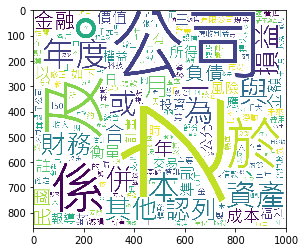

In [115]:
#再觀察一次文字雲並手動刪除不適合的資訊
from wordcloud import WordCloud
import matplotlib.pyplot as plt
tfidf_dict = df_tfidf.to_dict(orient='records')
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()

In [116]:
remove_list = ['之','及','。','於','或','與','係','本','為','一']
for item in remove_list:
    tfidf_dict[1].pop(item, None)

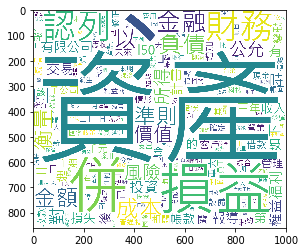

In [119]:
remove_list = ['之','及','。','於','或','與','係','本','為','一','合','公司','民國','年度','月','日','註','其他','年','應']
for item in remove_list:
    tfidf_dict[1].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()

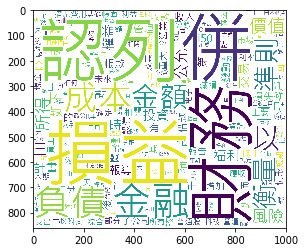

In [120]:
#結果圖呈現
remove_list = ['之','及','。','於','或','與','係','本','為','一','合','公司','民國','年度','月','日','註','其他','年','應']
remove_list = remove_list +['資產','、','有限公司','對','','','','','','','','','']
for item in remove_list:
    tfidf_dict[1].pop(item, None)
wordcloud = WordCloud(font_path = 'msjh.ttc', background_color="white",width=1000, height=860, margin=2)
wordcloud.fit_words(tfidf_dict[1])
plt.imshow(wordcloud)
plt.show()

## 「負債」和「併」(猜測為併購)這些比較危險的詞彙出現的頻率頗高，至於損益、金融、財物應為報表裡本來就經常出現的詞彙，只是沒有被TF-IDF濾除